In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn_dataset.csv to customer_churn_dataset (1).csv


In [ ]:
#import all the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
#Load the Dataset
df = pd.read_csv("customer_churn_dataset.csv")
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [ ]:
# examine the number of rows and columns, and data types

df.shape        # rows, columns
df.info()       # data types
df.describe()   # statistical summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


,customer_id,tenure,monthly_charges,total_charges,support_calls
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,10000.500000,36.467450,70.010531,2543.979209,1.51255
std,5773.647028,20.773984,28.890239,1882.949804,1.23524
min,1.000000,1.000000,20.000000,20.230000,0.00000
25%,5000.750000,18.000000,45.210000,1045.837500,1.00000
50%,10000.500000,36.000000,70.090000,2096.495000,1.00000
75%,15000.250000,54.000000,95.072500,3690.337500,2.00000
max,20000.000000,72.000000,120.000000,8629.920000,8.00000


In [ ]:
#check for missing values to ensure data completeness
df.isnull().sum()


,0
customer_id,0
tenure,0
monthly_charges,0
total_charges,0
contract,0
payment_method,0
internet_service,2013
tech_support,0
online_security,0
support_calls,0


In [ ]:
# Fill missing internet_service values with 'None'
df['internet_service'].fillna('None', inplace=True)



In [ ]:
# Remove Duplicate Records
df.duplicated().sum()
#Deletes duplicates permanently
df.drop_duplicates(inplace=True)


In [ ]:
# Convert Boolean Columns to Numeric
bool_cols = ['tech_support', 'online_security', 'churn']

for col in bool_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0}).astype(int)

/tmp/ipython-input-3225322254.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0}).astype(int)
/tmp/ipython-input-3225322254.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0}).astype(int)
/tmp/ipython-input-3225322254.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, 

In [ ]:
# Categorical features were encoded to numerical form using label encoding
for col in X_train.select_dtypes(include='object'):
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [ ]:
#Total charges were validated and recalculated to ensure consistency(real values has calculation errors)
df['calculated_total'] = df['tenure'] * df['monthly_charges']
df[['total_charges', 'calculated_total']].head()
df['total_charges'] = df['calculated_total']
df.drop('calculated_total', axis=1, inplace=True)


In [ ]:
#Outliers in billing data were handled using the IQR method
Q1 = df['monthly_charges'].quantile(0.25)
Q3 = df['monthly_charges'].quantile(0.75)
IQR = Q3 - Q1 #this finds a normal range

#Removes values too far from normal
df = df[(df['monthly_charges'] >= Q1 - 1.5 * IQR) &
        (df['monthly_charges'] <= Q3 + 1.5 * IQR)]


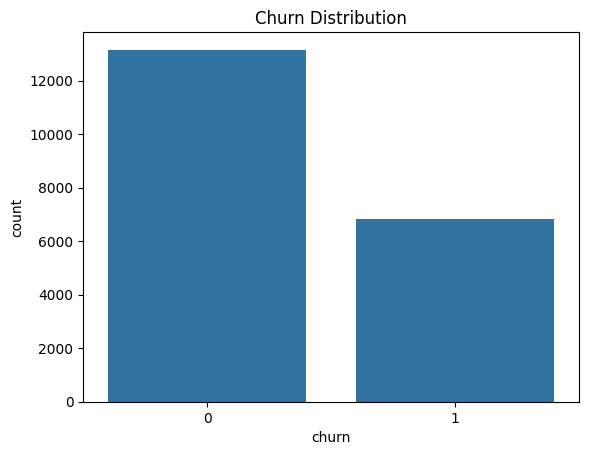

In [ ]:
#proportion of customers who churned
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()


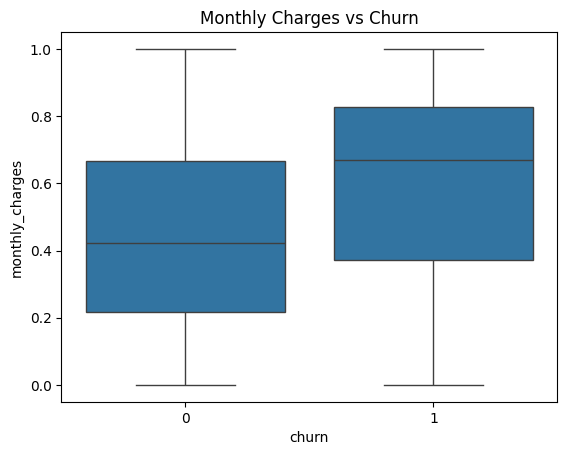

In [ ]:
#Monthly Charges vs Churn
sns.boxplot(x='churn', y='monthly_charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [ ]:
#separate features and target
X = df.drop(['churn', 'customer_id'], axis=1)
y = df['churn']


In [ ]:
#Train–test split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) # stratify=y Keeps 35% / 65% ratio intact and prevents biased testing


In [ ]:
#feature scaling
scaler = MinMaxScaler()

num_cols = ['tenure', 'monthly_charges', 'total_charges', 'support_calls']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
#Logistic Regression (Baseline Model)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


[[2373  258]
 [ 669  700]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      2631
           1       0.73      0.51      0.60      1369

    accuracy                           0.77      4000
   macro avg       0.76      0.71      0.72      4000
weighted avg       0.76      0.77      0.76      4000



In [ ]:
#Random Forest Classifier (Final Model)
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


[[2465  166]
 [ 478  891]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      2631
           1       0.84      0.65      0.73      1369

    accuracy                           0.84      4000
   macro avg       0.84      0.79      0.81      4000
weighted avg       0.84      0.84      0.83      4000



In [ ]:
#ROC-AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.7970400675876961


In [ ]:
#Feature Importance (Key Business Insight)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
1,monthly_charges,0.274289
2,total_charges,0.189312
0,tenure,0.148232
8,support_calls,0.116911
3,contract,0.100079
6,tech_support,0.082920
4,payment_method,0.041007
5,internet_service,0.028585
7,online_security,0.018665


In [ ]:
#Predict for a Sample Customer
sample_customer = X_test.iloc[[0]]

prediction = rf.predict(sample_customer)
probability = rf.predict_proba(sample_customer)[0][1]

print("Prediction:", "Churn" if prediction[0] == 1 else "No Churn")
print("Churn Probability:", round(probability, 2))


Prediction: No Churn
Churn Probability: 0.04
